Семестровая по машинному обучению на тему «предсказание возраста морского ушка»

Источник данных:
https://archive.ics.uci.edu/ml/datasets/Abalone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
filename = "abalone.data"
columns = ["Sex", "Length", "Diameter",
           "Height", "Whole", "Shucked",
           "Viscera", "Shell", "Rings"]

df = pd.read_csv(filename, names = columns)
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df["Age"] = df["Rings"] + 1.5

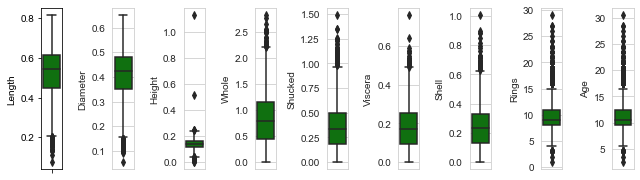

In [4]:
l = df.loc[:, 'Length':].columns.values
number_of_columns = 9
number_of_rows = len(l)//number_of_columns
plt.figure(figsize=(number_of_columns,(int)(5*number_of_rows)))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df[l[i]],color='green',orient='v')
    plt.tight_layout()

In [5]:
df.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


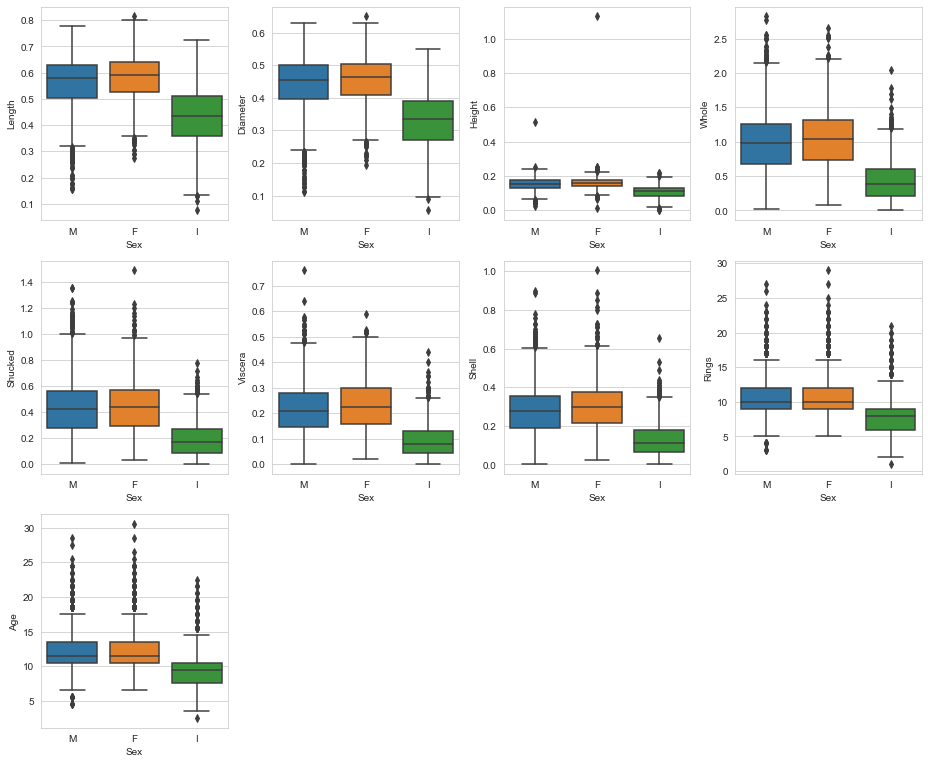

In [6]:
l = df.loc[:, 'Length':].columns
number_of_rows=len(l)
plt.figure(figsize=(13,35))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,4,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x="Sex", y=l[i], data=df, orient='v')
    plt.tight_layout()

In [7]:
df["IsMale"] = (df["Sex"]=="M").astype(int)
df["IsFemale"] = (df["Sex"]=="F").astype(int)

In [8]:
df

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Age,IsMale,IsFemale
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,1,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,1,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,0,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,1,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,0,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,1,0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,1,0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,0,1


<AxesSubplot:>

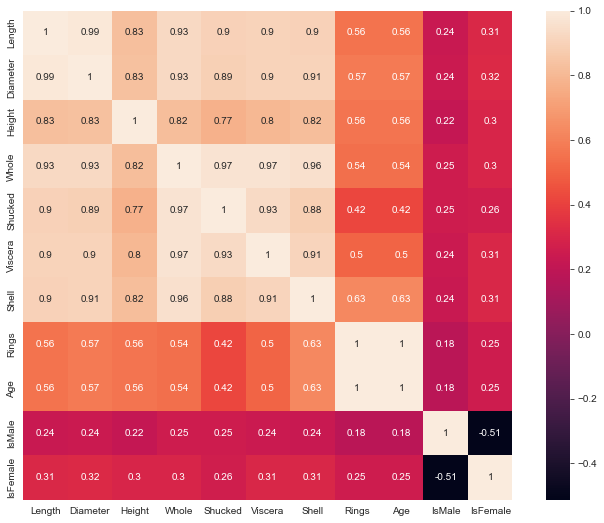

In [9]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

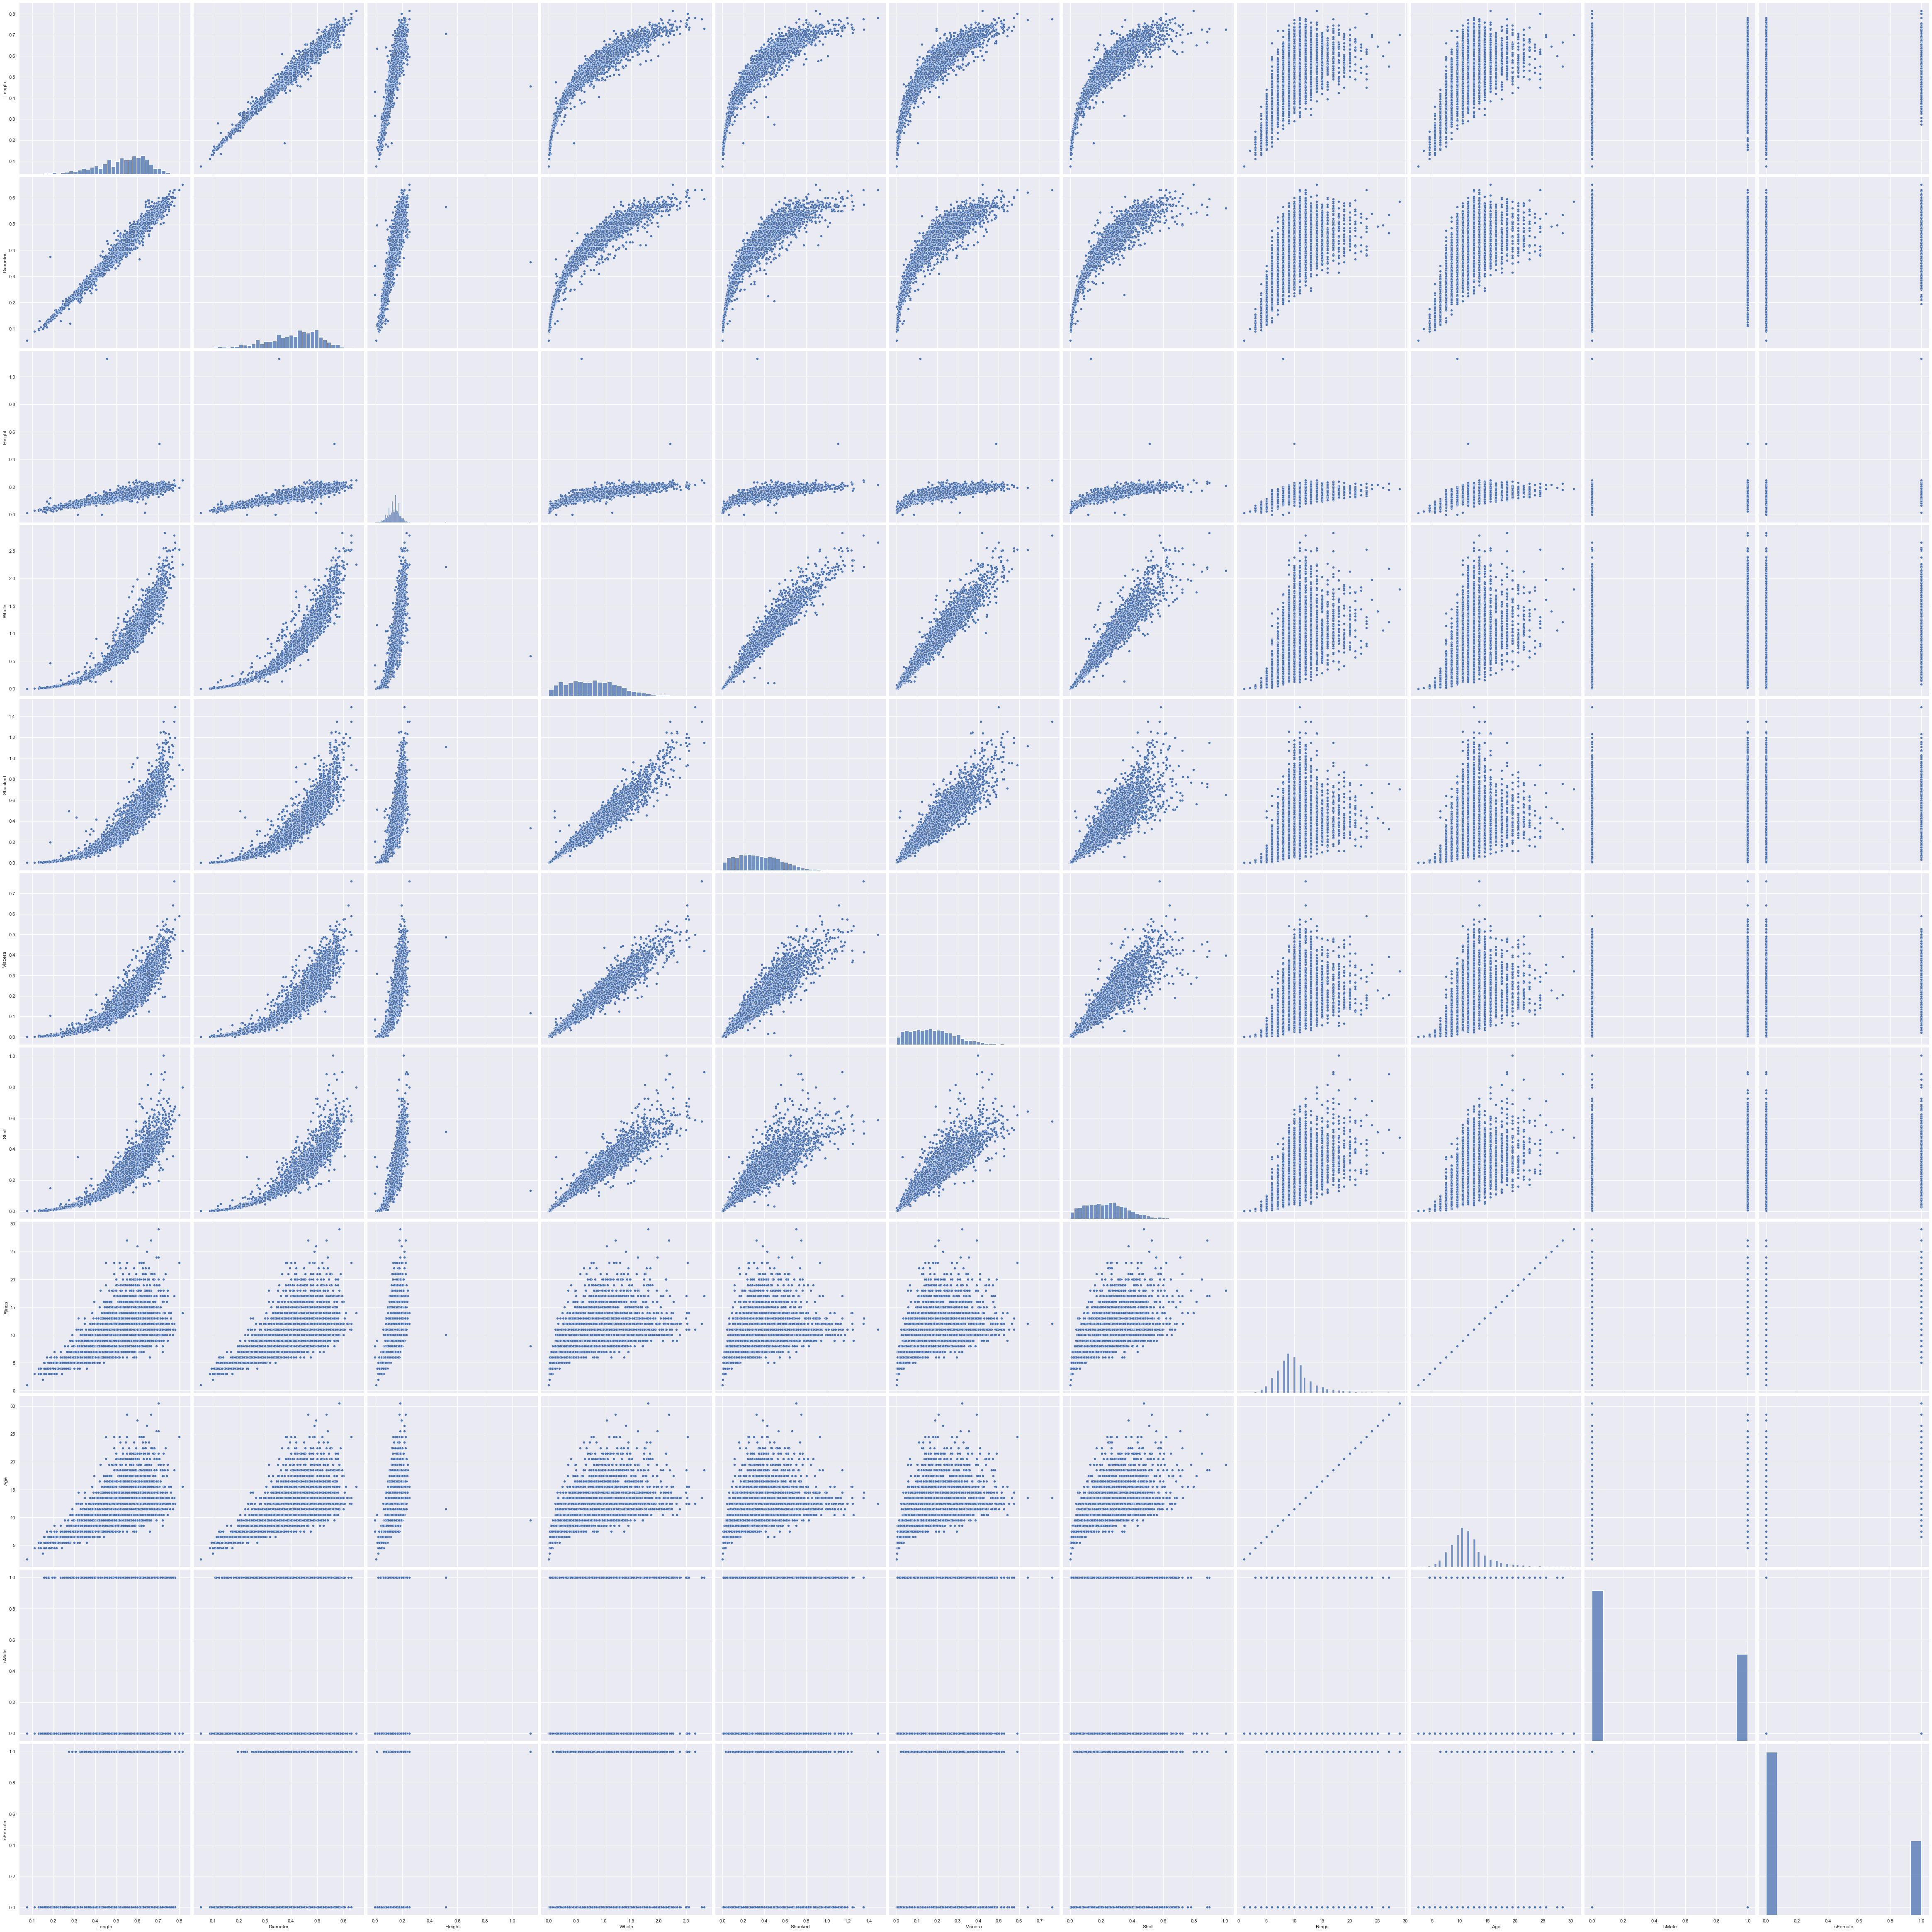

In [10]:
sns.set()
sns.pairplot(df, height = 6)
plt.show();

In [11]:
df[df["Height"] > 0.4]

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Age,IsMale,IsFemale
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10,11.5,1,0
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8,9.5,0,1


In [12]:
df[df["Shucked"] > 1.3]

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Age,IsMale,IsFemale
1209,F,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,11,12.5,0,1
1528,M,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015,13,14.5,1,0
1763,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12,13.5,1,0


In [13]:
df[df["Viscera"] > 0.6]

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Age,IsMale,IsFemale
1762,M,0.770,0.62,0.195,2.5155,1.1155,0.6415,0.642,12,13.5,1,0
1763,M,0.775,0.63,0.250,2.7795,1.3485,0.7600,0.578,12,13.5,1,0


In [14]:
df[df["Shell"] > 0.8]

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Age,IsMale,IsFemale
163,F,0.725,0.560,0.210,2.1410,0.6500,0.3980,1.005,18,19.5,0,1
164,F,0.650,0.545,0.230,1.7520,0.5605,0.2895,0.815,16,17.5,0,1
166,F,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.850,20,21.5,0,1
891,M,0.730,0.595,0.230,2.8255,1.1465,0.4190,0.897,17,18.5,1,0
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885,27,28.5,1,0
2161,F,0.715,0.565,0.240,2.1995,0.7245,0.4650,0.885,17,18.5,0,1


In [15]:
clean_df = df.copy()

clean_df.drop(clean_df[clean_df["Height"] > 0.4].index, axis=0, inplace=True)
clean_df.drop(clean_df[clean_df["Shucked"] > 1.3].index, axis=0, inplace=True)
clean_df.drop(clean_df[clean_df["Viscera"] > 0.6].index, axis=0, inplace=True)
clean_df.drop(clean_df[clean_df["Shell"] > 0.8].index, axis=0, inplace=True)
clean_df.drop(clean_df[clean_df["Height"] > 0.4].index, axis=0, inplace=True)

clean_df.drop(["Sex","Length", "Whole", "Rings"], axis=1, inplace=True)


<AxesSubplot:>

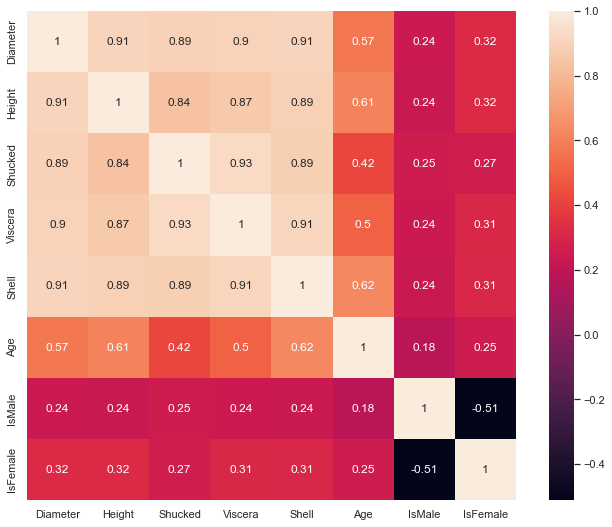

In [16]:
corrmat = clean_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

In [17]:
clean_df_2 = df.copy()

clean_df_2.drop(clean_df_2[clean_df_2["Height"] > 0.4].index, axis=0, inplace=True)
clean_df_2.drop(clean_df_2[clean_df_2["Shucked"] > 1.3].index, axis=0, inplace=True)
clean_df_2.drop(clean_df_2[clean_df_2["Viscera"] > 0.6].index, axis=0, inplace=True)
clean_df_2.drop(clean_df_2[clean_df_2["Shell"] > 0.8].index, axis=0, inplace=True)
clean_df_2.drop(clean_df_2[clean_df_2["Height"] > 0.4].index, axis=0, inplace=True)

clean_df_2.drop(["Sex", "Length", "Diameter", "Whole", "Viscera", "Shell", "Rings", ], axis=1, inplace=True)


<AxesSubplot:>

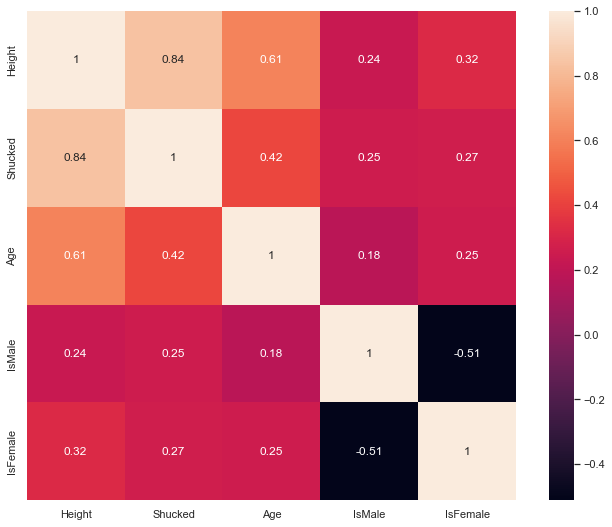

In [18]:
corrmat = clean_df_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

In [22]:
import sklearn

from sklearn.preprocessing import StandardScaler

In [31]:
scaler1 = StandardScaler()
scaler1.fit(clean_df)
ndata_1 = scaler1.transform(clean_df)

In [32]:
scaler2 = StandardScaler()
scaler2.fit(clean_df_2)
ndata_2 = scaler2.transform(clean_df_2)

In [36]:
ndata_1

array([[-0.42885041, -1.14844407, -0.60750826, ...,  1.5852054 ,
         1.31777497, -0.67398796],
       [-1.4394374 , -1.27897044, -1.17770472, ..., -0.91061485,
         1.31777497, -0.67398796],
       [ 0.12697243, -0.10423307, -0.46153796, ..., -0.28665979,
        -0.7588549 ,  1.48370602],
       ...,
       [ 0.68279527,  1.72313618,  0.76552483, ..., -0.28665979,
         1.31777497, -0.67398796],
       [ 0.78385397,  0.28734606,  0.79061347, ...,  0.02531774,
        -0.7588549 ,  1.48370602],
       [ 1.49126486,  1.46208343,  2.68138495, ...,  0.6492728 ,
         1.31777497, -0.67398796]])